In [1]:
import numpy as np
import pandas as pd
import sidetable
from sklearn import datasets
import pandas_profiling
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import power_transform

In [2]:
class DataCleaning():
    def __init__(self):
        path = r'../../../../data/titanic.csv'
        self.df = pd.read_csv(
            filepath_or_buffer=path,
            sep=',',
            decimal='.',
        )

    def dataframe(self):
        df = self.df.head()
        display(df)

    def shape(self):
        df = self.df.shape
        display(df)

    def tipos_presentes_no_dataframe(self):
        df = self.df.dtypes
        display(df)        

    def contagem_valores_de_duplicados(self):
        df = self.df.duplicated(keep=False).sum()
        display(df)

    def as_linhas_que_estão_duplicadas(self):
        df = self.df[self.df.duplicated(keep=False)]
        display(df)

    def contagem_valores_de_duplicados_por_coluna(self):
        df = self.df.apply(lambda x: x.duplicated()).sum()
        display(df)

    def removendo_valores_duplicados(self):
        df = self.df.drop_duplicates()
        display(df)

    def contagem_de_valores_ausentes(self):
        df = self.df.isna().sum()
        display(df)

    def contagem_de_valores_nulos(self):
        df = self.df.isnull().sum()
        display(df)

    def porcentagem_de_valores_nulos(self):
        
        quantidade_de_nulos = self.df.isnull().sum() * 100
        quantidade_de_linhas = self.df.shape[0]
        
        df = quantidade_de_nulos / quantidade_de_linhas
        display(df.round(decimals=2))       

    def identificar_quantos_valores_duplicados_há_em_cada_duplicata(self):
        df = (
                self.df
                .groupby(self.df.columns.tolist(), dropna=False)
                .size()
                .to_frame('n_duplicates')
                .query('n_duplicates>1')
                .sort_values('n_duplicates', ascending=False)
                .head(5)
            )
        
        display(df)

    def identificar_e_mostrar_valores_nulos(self):
        df = (
            self.df.isna().sum()
            .to_frame('missing_count')
            .join((self.df.isna().sum() / self.df.shape[0]).to_frame('missing_pct'))
            .sort_values('missing_count', ascending=False)
        )

        df = df.style.format('{:.2%}', subset=['missing_pct'])

        display(df)

    def removendo_valores_nulos(self):
        df = self.df.dropna()
        display(df)

    def substituido_valores_nulos(self):
        df = (
                self.df.fillna({'Age': self.df.Age.mean()}).tail()
            )
        
        display(df)

    def indentificando_outlines(self):
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        df = self.df.select_dtypes(include=numerics)
        
        df.apply(scale).plot.box()
        plt.xticks(
            rotation=60,
            ha='right'
        )

    def is_outlier(self, array=[0,56,47,4,43,6,74,546,4,322,77], extreme=False):
        """Custom function to identify outliers in an array"""
        q1,q3 = np.quantile(array, [.25,.75])
        iqr = q3-q1
        
        factor = 3. if extreme else 1.5
        upper_outlier = q3 + factor*iqr
        lower_outlier = q1 - factor*iqr

        return (array < lower_outlier) | (array > upper_outlier)
        
    def outlier_presentes_no_dataframe(self):
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        df = self.df.select_dtypes(include=numerics)
        df = df.apply(self.is_outlier).sum()

        display(df)

    def removendo_outliers(self):
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        df = self.df.select_dtypes(include=numerics)
        df = df[
            (-df.apply(self.is_outlier).any(axis=1))
        ]

        display(df)

    def zscore_outlier(self, array=[0,56,47,4,43,6,74,546,4,322,77]):
        scaled_array = scale(array)
        return (scaled_array<-3) | (scaled_array>3)
    
    def describe_do_df(self):
        df = self.df.describe(
            percentiles=[.01, .25, .5, .75, .9, .99]
        ).round(decimals=2)
        display(df)

    def cap_values(self, array=[0,56,47,4,43,6,74,546,4,322,77], lower_quantile=0, upper_quantile=1.):
        array = self.df.Age
        array = array.copy()
        lower_quantile = np.quantile(array, lower_quantile)
        upper_quantile = np.quantile(array, upper_quantile)
        
        array[array<lower_quantile] = lower_quantile
        array[array>upper_quantile] = upper_quantile
        
        return array
    
    def figura_lado_a_lado_dos_dados_originais_e_padronizados_destacando_3_std(
            self,
            array=[56,47,4,43,6,74,546,4,322,77]
                                                                               ):
        df = pd.DataFrame(array, columns = ['numeros'])

        fig,axes = plt.subplots(ncols=2, figsize=(18,6))

        df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier')
        df.apply(np.log).apply(scale).plot.box(ax=axes[1], title='Boxplot com transformação log')

        fig.autofmt_xdate(rotation=60, ha='right')
        plt.show()
    
    def box_plot_removendo_outliers(self, array=[56,47,4,43,6,74,546,4,322,77]):
        df = pd.DataFrame(array, columns = ['numeros'])

        df_boxbox = pd.DataFrame(power_transform(df, method='box-cox'), columns=df.columns)

        fig,axes = plt.subplots(ncols=2, figsize=(18,6))

        df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier')
        df_boxbox.plot.box(ax=axes[1], title='Boxplot com transformação Box-cox')

        fig.autofmt_xdate(rotation=60, ha='right')
        plt.show()

    def relatório(self):
        df = self.df.profile_report()
        display(df)

    def lista_de_atributos(self):
        df = self.df
        display(dir(pd))


if __name__ == '__main__':
    data_cleaning = DataCleaning()

In [3]:
data_cleaning.dataframe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_cleaning.shape()

(891, 12)

In [5]:
data_cleaning.tipos_presentes_no_dataframe()

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data_cleaning.contagem_valores_de_duplicados()

0

In [7]:
data_cleaning.as_linhas_que_estão_duplicadas()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [8]:
data_cleaning.identificar_quantos_valores_duplicados_há_em_cada_duplicata()

,,,,,,,,,,,,n_duplicates
PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,


In [9]:
data_cleaning.contagem_valores_de_duplicados_por_coluna()

PassengerId      0
Survived       889
Pclass         888
Name             0
Sex            889
Age            802
SibSp          884
Parch          884
Ticket         210
Fare           643
Cabin          743
Embarked       887
dtype: int64

In [10]:
data_cleaning.removendo_valores_duplicados()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
data_cleaning.contagem_de_valores_ausentes()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
data_cleaning.contagem_de_valores_nulos()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
data_cleaning.porcentagem_de_valores_nulos()

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [14]:
data_cleaning.identificar_e_mostrar_valores_nulos()

,missing_count,missing_pct
Cabin,687,77.10%
Age,177,19.87%
Embarked,2,0.22%
PassengerId,0,0.00%
Survived,0,0.00%
Pclass,0,0.00%
Name,0,0.00%
Sex,0,0.00%
SibSp,0,0.00%
Parch,0,0.00%


In [15]:
data_cleaning.removendo_valores_nulos()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [16]:
data_cleaning.substituido_valores_nulos()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,NaN,Q


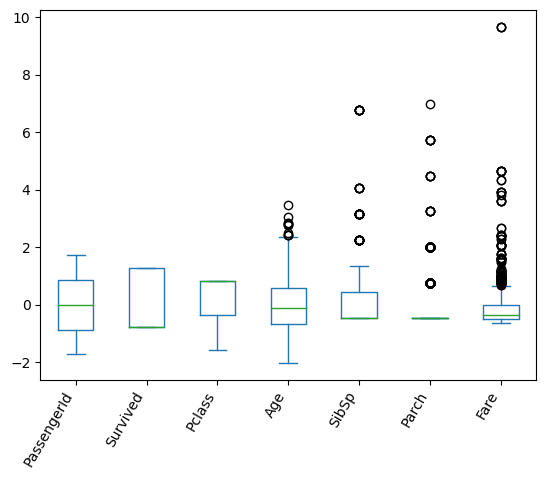

In [17]:
data_cleaning.indentificando_outlines()

In [18]:
data_cleaning.is_outlier()

array([False, False, False, False, False, False, False,  True, False,
        True, False])

In [19]:
data_cleaning.outlier_presentes_no_dataframe()

PassengerId      0
Survived         0
Pclass           0
Age              0
SibSp           46
Parch          213
Fare           116
dtype: int64

In [20]:
data_cleaning.removendo_outliers()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
5,6,0,3,NaN,0,0,8.4583
...,...,...,...,...,...,...,...
884,885,0,3,25.0,0,0,7.0500
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
889,890,1,1,26.0,0,0,30.0000


In [21]:
data_cleaning.zscore_outlier()

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [22]:
data_cleaning.describe_do_df()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
1%,9.90,0.00,1.00,1.00,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
90%,802.00,1.00,3.00,50.00,1.00,2.00,77.96
99%,882.10,1.00,3.00,65.87,5.00,4.00,249.01


In [23]:
data_cleaning.cap_values()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

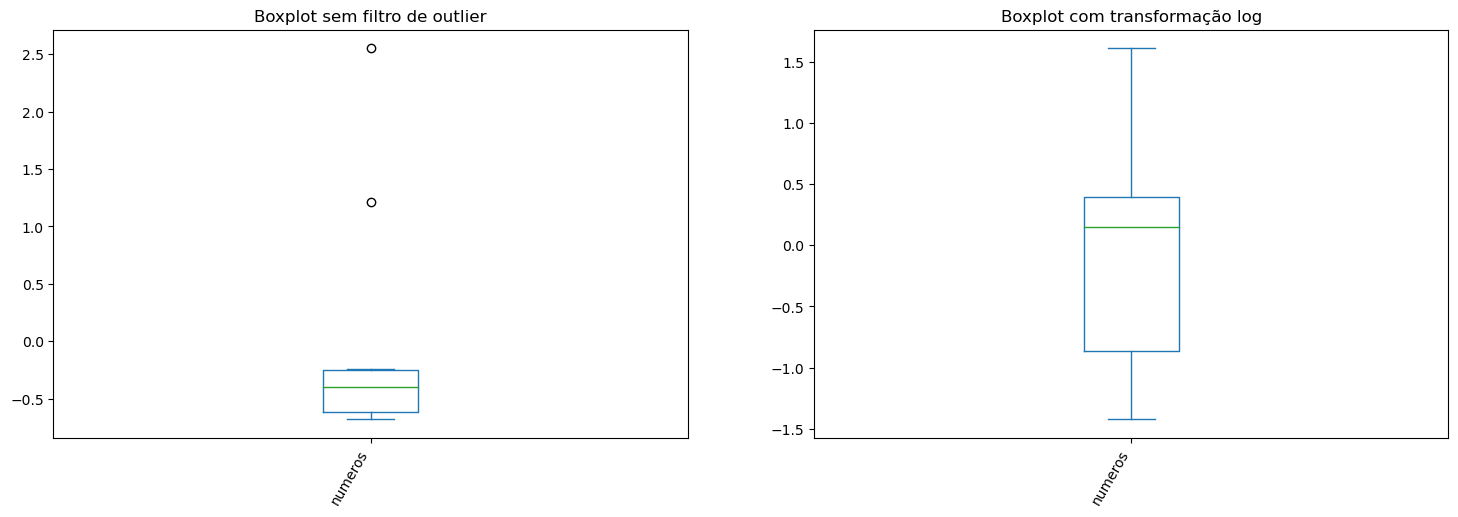

In [24]:
data_cleaning.figura_lado_a_lado_dos_dados_originais_e_padronizados_destacando_3_std()

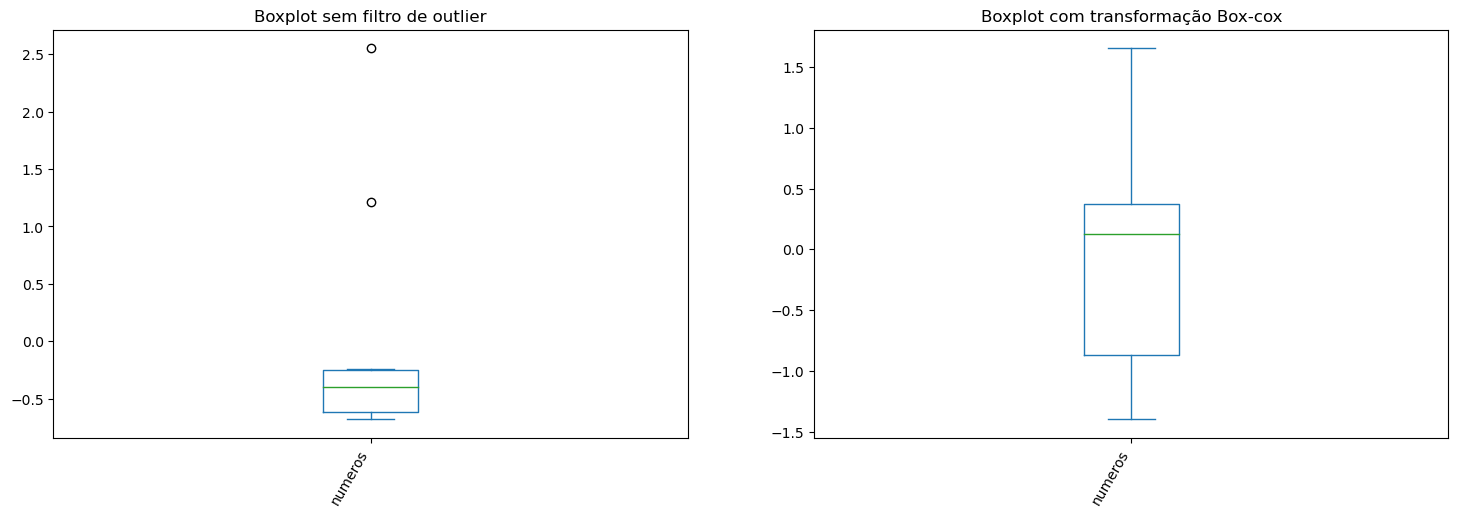

In [25]:
data_cleaning.box_plot_removendo_outliers()

In [26]:
# data_cleaning.relatório()

In [27]:
data_cleaning.lista_de_atributos()

['BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int64Index',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt64Index',
 'UInt8Dtype',
 '__all__',
 '__builtins__',
 '__cached__',
 '__deprecated_num_index_names',
 '__dir__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_is_numpy_dev',
 '_libs',
 '_testing',
 '_typing',
 '_ve